<a href="https://colab.research.google.com/github/KauaHenSilva/python_img_segmentation/blob/main/adaptive_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limiar adaptativa

## Setup

In [32]:
from google.colab import drive
# Drive: https://drive.google.com/drive/folders/183rn85BNl8IXWPW80Y-ftPFnrNrGRcTI?usp=drive_link
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!cp -R "/content/drive/MyDrive/Segmentação Imagens Python AZ/imagens" "/content/imagens"

## Imports

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

## Implementação

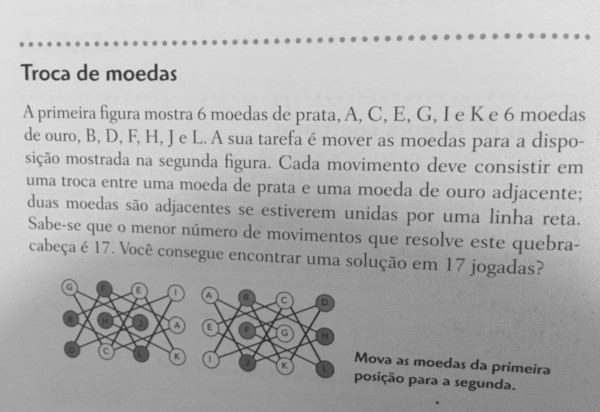

In [35]:
img = cv2.imread("/content/imagens/livro-texto.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

In [36]:
value, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
value

175.0

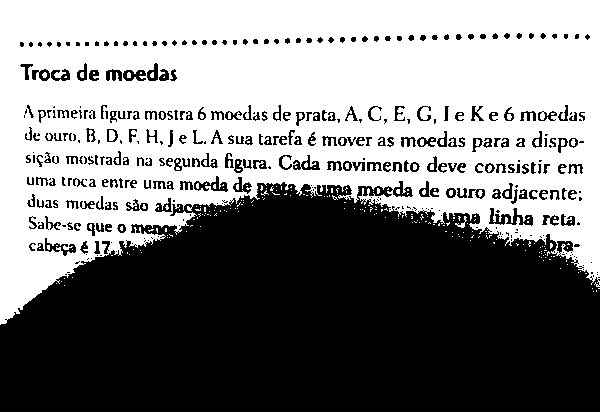

In [37]:
cv2_imshow(otsu)

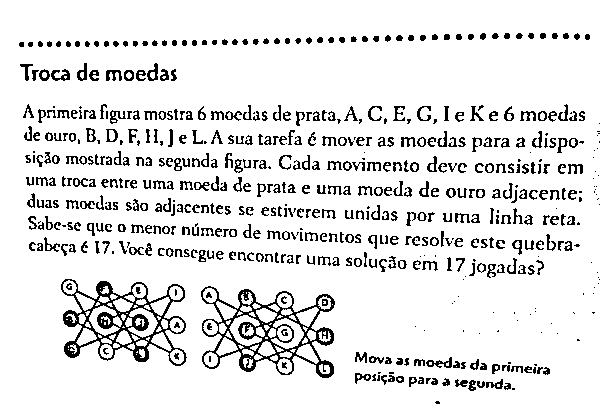

In [38]:
adapt_media = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

## Limiarização adaptativa Gaussiana

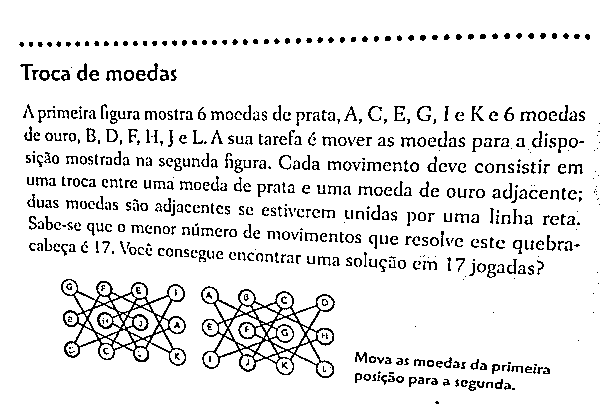

In [39]:
adapt_media = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

In [40]:
def limiarizacao_adaptativa(img, limiar = 140, block_size = 11, C = 9):
  _, limiar_global = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
  limiar_media = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
  limiar_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

  imagens = [img, limiar_global, limiar_media, limiar_gauss]
  titulos = ['Imagem original', 'Limiarização global', 'Limiarização adaptativa - média', 'Limiarização adaptativa - gaussina']

  fig = plt.gcf()
  fig.set_size_inches(18,12)

  for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imagens[i], cmap='gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])

  plt.show()

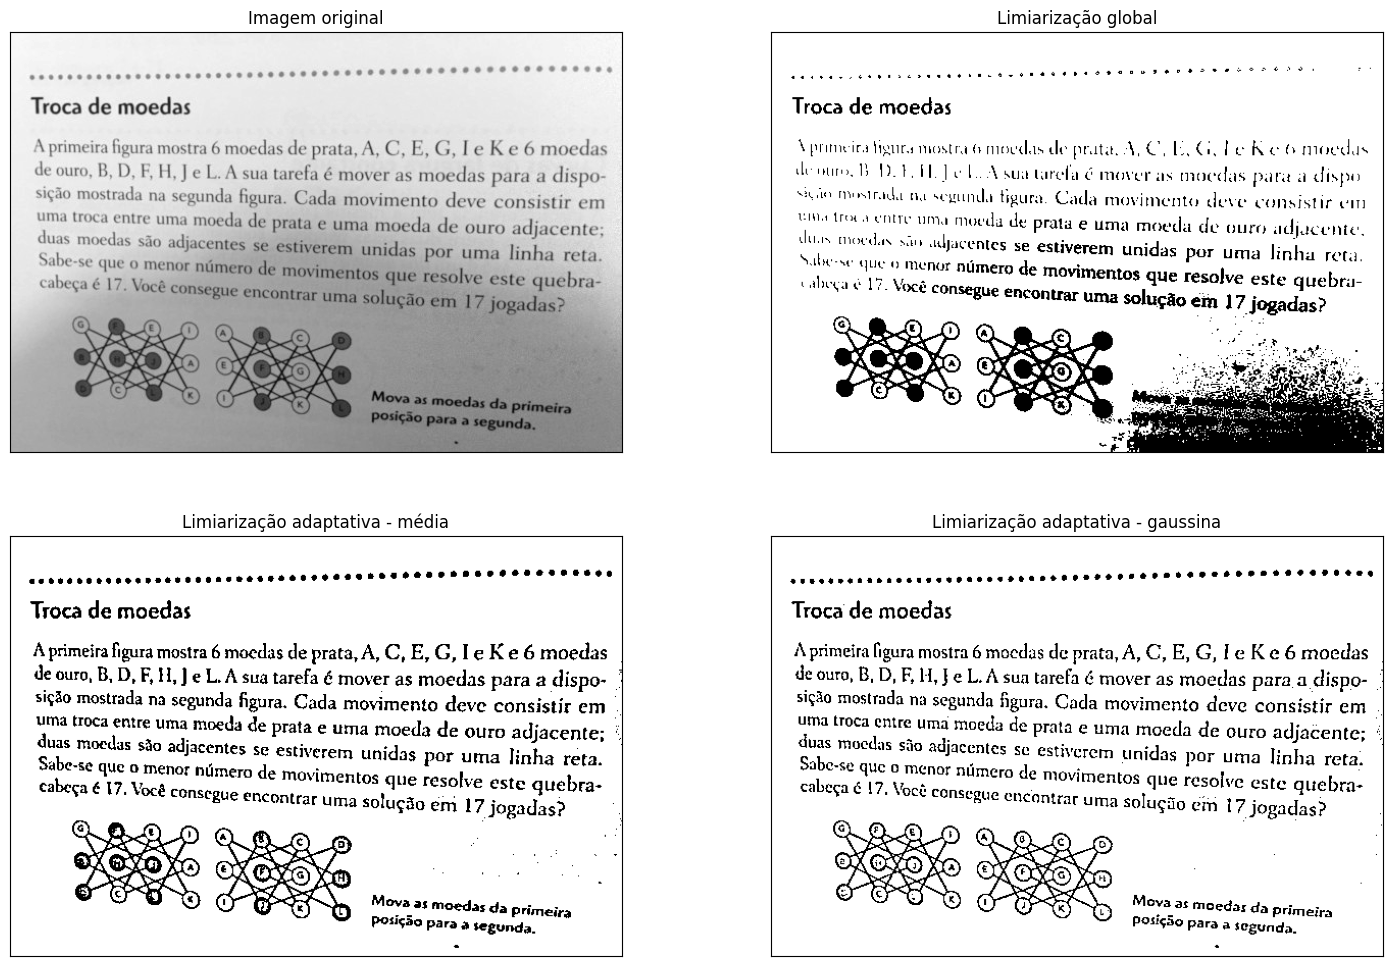

In [41]:
limiarizacao_adaptativa(img)

### Segmentação com contornos

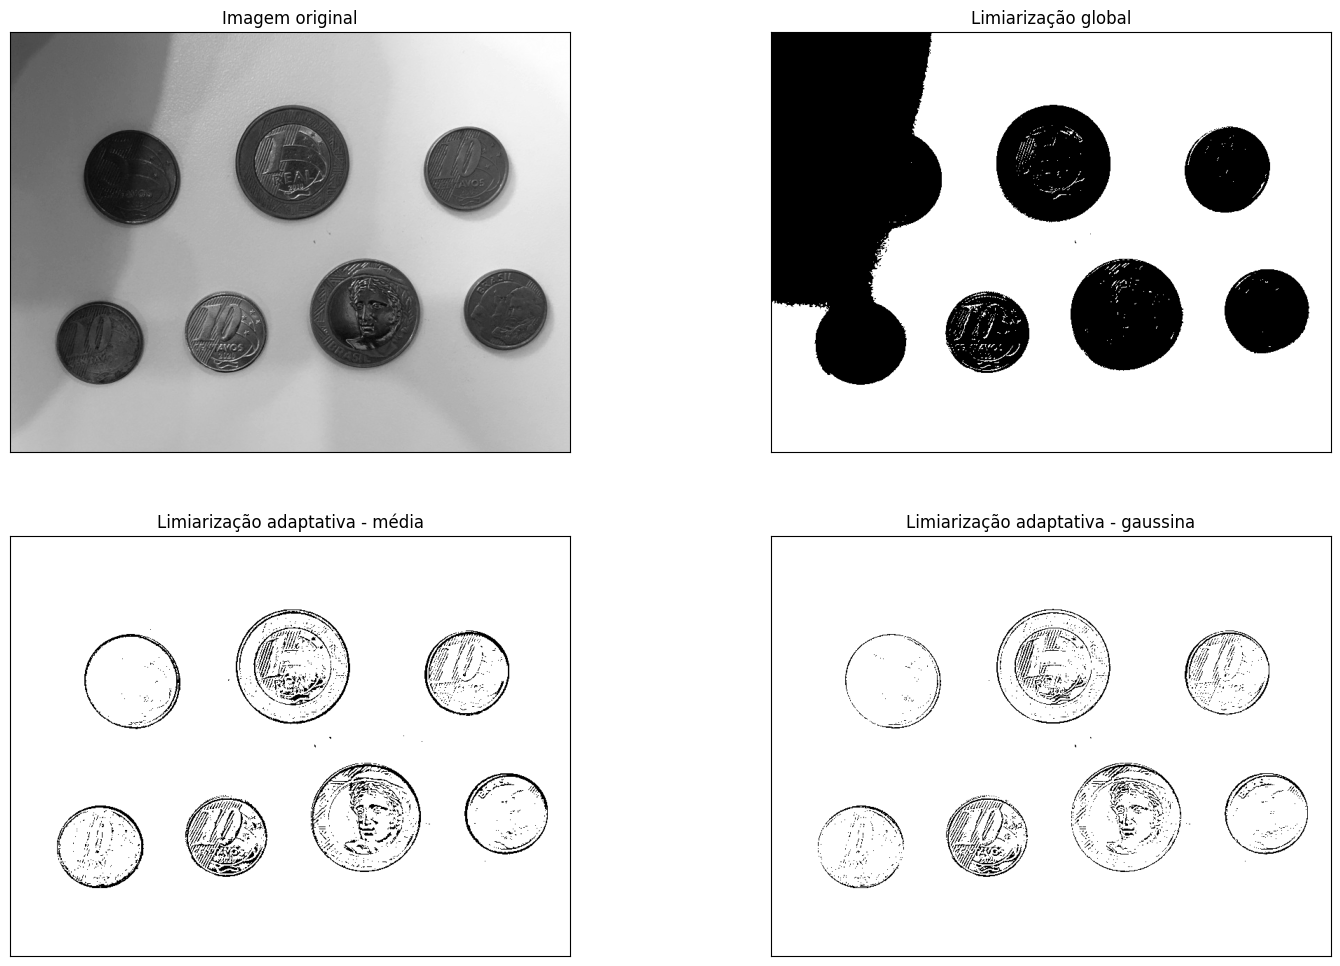

In [45]:
img = cv2.imread('imagens/moedas02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
limiarizacao_adaptativa(gray, C = 15)

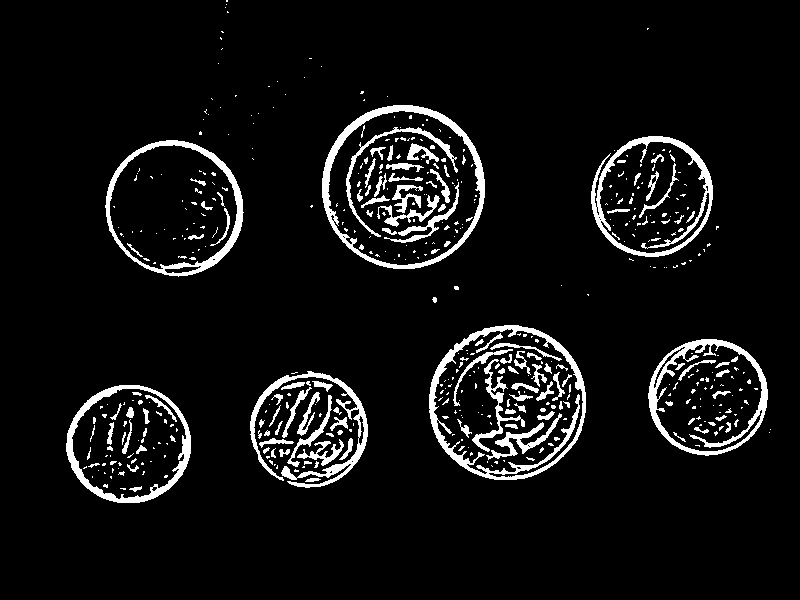

In [47]:
img_processada = img.copy()
desfoque = cv2.GaussianBlur(gray, (7,7), 0)
adapt_gauss = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
cv2_imshow(adapt_gauss)

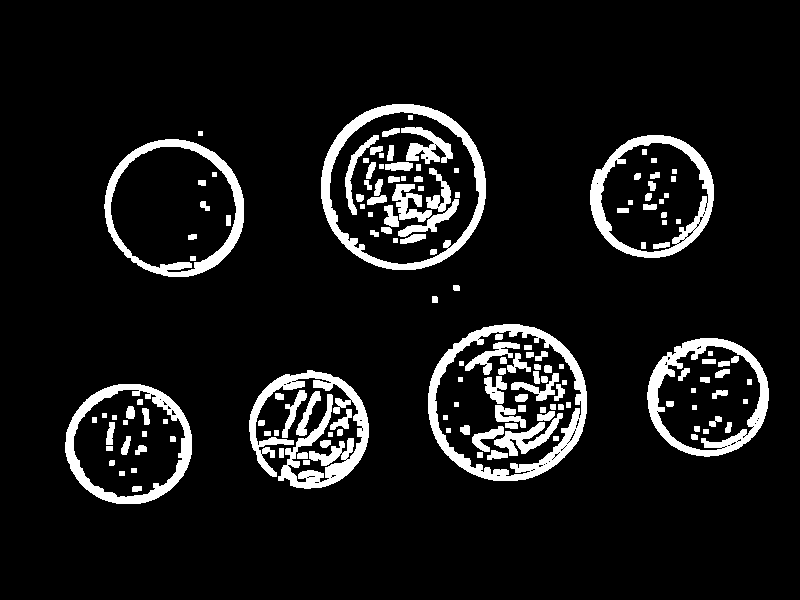

In [48]:
kernel = np.ones((3,3), np.uint8)
erosao = cv2.erode(adapt_gauss, kernel)
dilatacao = cv2.dilate(erosao, kernel, iterations=2)
cv2_imshow(dilatacao)

11890.0
4488.0
11224.5
19629.5
14989.0
11794.0
21550.0


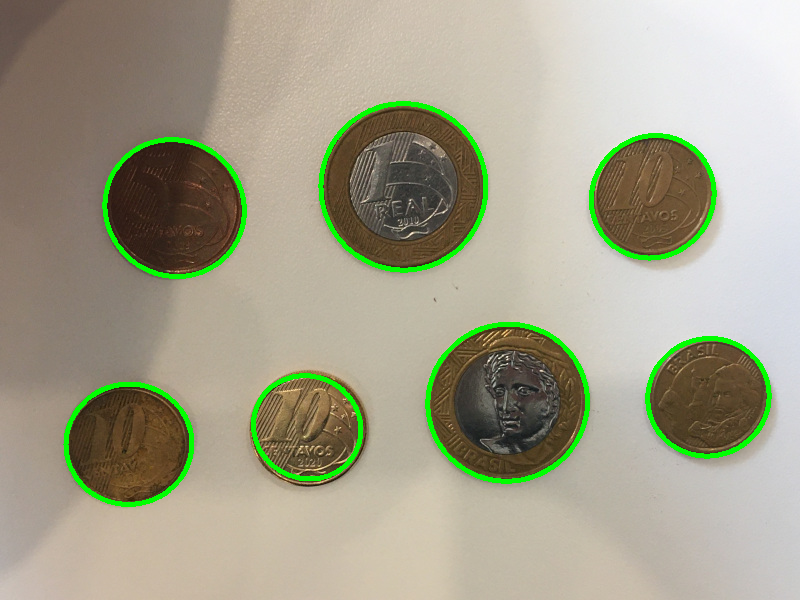

In [49]:
elementos = dilatacao.copy()
contornos, hierarquia = cv2.findContours(elementos, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_processada = img.copy()
for cnt in contornos:
  area = cv2.contourArea(cnt)
  if area >= 1000:
    print(area)
    elipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img_processada, elipse, (0,255,0), 3)
cv2_imshow(img_processada)

### Sobreposição com limiar adaptativo

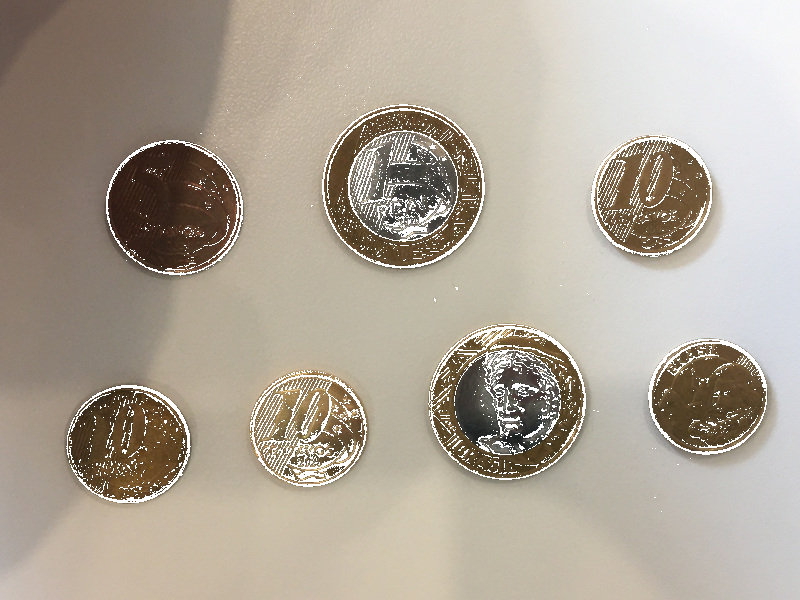

In [51]:
adapt_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 11)
sobrepor = cv2.add(img, cv2.cvtColor(adapt_gauss, cv2.COLOR_GRAY2BGR))
cv2_imshow(sobrepor)